# 2. Logistic Regression

## 2.1 Understanding the data

### 0. load liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset

In [3]:
data = pd.read_csv("synthetic_software_defect.csv")
data

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


### 2. Take a look at some samples of your dataset. How many sample are there? How many of your features are numerical, categorical, and binary?

**Answer: ** 1 bool , 17 float , 5 int

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

### 3. Name two features that have more correlation with the target column?

In [5]:
data.corr()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,1.000000,0.000790,0.003252,-0.000786,0.001259,0.003580,0.004500,-0.002157,0.004466,-0.000969,...,0.003029,0.003214,0.003859,0.001628,0.004068,0.003751,0.003615,0.004165,0.002146,0.001976
loc,0.000790,1.000000,0.761509,0.544569,0.696327,0.759605,0.758069,-0.388018,0.599474,0.486427,...,0.803460,0.528029,0.670751,0.246244,0.367068,0.637582,0.764612,0.761662,0.762755,0.342642
v(g),0.003252,0.761509,1.000000,0.729249,0.790553,0.631041,0.618267,-0.387270,0.574305,0.304531,...,0.641835,0.379520,0.461759,0.208324,0.389917,0.532358,0.639125,0.606453,0.966702,0.301187
ev(g),-0.000786,0.544569,0.729249,1.000000,0.545255,0.390504,0.367697,-0.325488,0.357735,0.160594,...,0.382541,0.292689,0.282293,0.164563,0.200460,0.279100,0.394963,0.372867,0.774752,0.259928
iv(g),0.001259,0.696327,0.790553,0.545255,1.000000,0.589718,0.585134,-0.291631,0.487112,0.319971,...,0.636895,0.337728,0.426030,0.178546,0.378869,0.550633,0.591597,0.567097,0.747870,0.245618
n,0.003580,0.759605,0.631041,0.390504,0.589718,1.000000,0.928390,-0.300350,0.808291,0.725408,...,0.911761,0.566374,0.775345,0.262916,0.618021,0.818994,0.963373,0.953080,0.626009,0.258080
v,0.004500,0.758069,0.618267,0.367697,0.585134,0.928390,1.000000,-0.254087,0.748121,0.673386,...,0.899258,0.531985,0.735278,0.242057,0.544283,0.798964,0.936446,0.942189,0.608678,0.231179
l,-0.002157,-0.388018,-0.387270,-0.325488,-0.291631,-0.300350,-0.254087,1.000000,-0.426309,-0.162300,...,-0.289713,-0.187982,-0.288838,-0.125480,-0.399440,-0.283644,-0.294469,-0.290559,-0.416185,-0.253237
d,0.004466,0.599474,0.574305,0.357735,0.487112,0.808291,0.748121,-0.426309,1.000000,0.515402,...,0.778856,0.486619,0.676297,0.268184,0.782781,0.690652,0.808275,0.784738,0.575155,0.241936
i,-0.000969,0.486427,0.304531,0.160594,0.319971,0.725408,0.673386,-0.162300,0.515402,1.000000,...,0.677093,0.435828,0.654349,0.214151,0.527640,0.803330,0.702058,0.740201,0.313935,0.208577


In [6]:
data.corr()["defects"].sort_values(ascending=False)[1:3]

loc            0.342642
branchCount    0.322827
Name: defects, dtype: float64

**Answer :**
1. loc
2. branchCount

### 4. Keep those two features you found in the previous question along with the target column, then drop the rest of the features of your dataset.

In [7]:
data = data[["loc","branchCount","defects"]]
data

,loc,branchCount,defects
0,22.0,5.0,False
1,14.0,3.0,False
2,11.0,3.0,False
3,8.0,1.0,True
4,11.0,3.0,False
...,...,...,...
101758,10.0,3.0,False
101759,27.0,9.0,False
101760,26.0,1.0,False
101761,10.0,3.0,False


### 5. Are there duplicate samples in your dataset? What percent of your samples are duplicates? Drop the duplicates.

In [8]:
old_data = data

In [9]:
data = data.drop_duplicates()

percentage = ((len(old_data) - len(data)) / len(old_data)) * 100

percentage

92.06194785924157

### 6. Your data has only three columns now and has no duplicates. Plot the histogram of both your selected features.

**loc :**

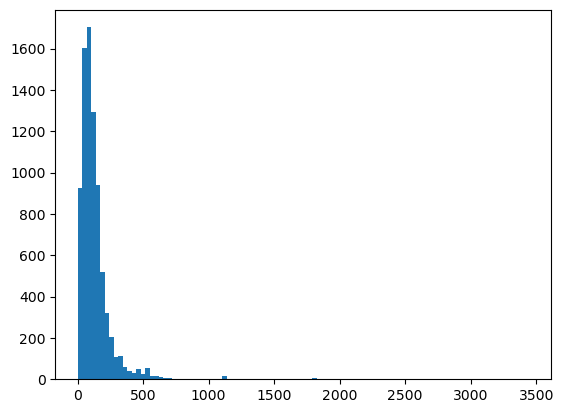

In [10]:
plt.hist(data["loc"], bins=100)
plt.show()

**branchCount :**

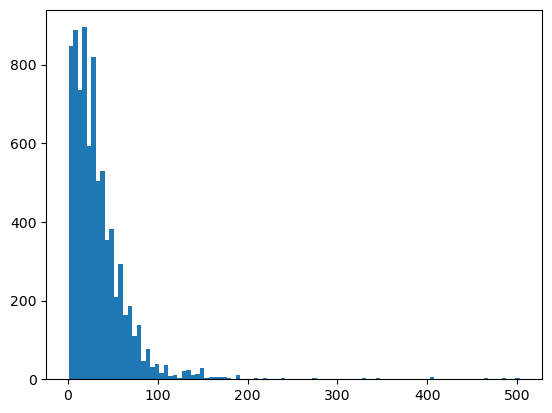

In [11]:
plt.hist(data["branchCount"], bins=100)
plt.show()

### 7. What common distribution do these features have? what is the name of this distribution?
**Answer :**
exponetional distribution

### 8. Your logistic regression model will profit if you transform this data distribution to another one.Use np.log1p() to log-transform your selected features.

In [12]:
data[["loc", "branchCount"]] = data[["loc", "branchCount"]].apply(np.log1p)
data["defects"] = data["defects"].map({True: 1, False: 0})

C:\Users\ParadoX\AppData\Local\Temp\ipykernel_1592\1412796298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["loc", "branchCount"]] = data[["loc", "branchCount"]].apply(np.log1p)
C:\Users\ParadoX\AppData\Local\Temp\ipykernel_1592\1412796298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["defects"] = data["defects"].map({True: 1, False: 0})


In [13]:
data

,loc,branchCount,defects
0,3.135494,1.791759,0
1,2.708050,1.386294,0
2,2.484907,1.386294,0
3,2.197225,0.693147,1
5,3.178054,2.079442,0
...,...,...,...
101658,5.820083,4.290459,1
101687,5.176150,3.258097,1
101708,5.003946,3.688879,1
101730,5.866468,3.871201,0


### 9. Whats the difference between np.log1p() and np.log()?
**Answer :**
The main difference between np.log() and np.log1p() is that np.log1p() is designed to be more numerically stable when the input values are close to zero, preventing potential division by zero errors.

### 10. Now your data has only 3 columns, no duplicates, and also your features are log-transformed. Plot the histogram of your features again. Compare their distribution before and after the log-trasform.

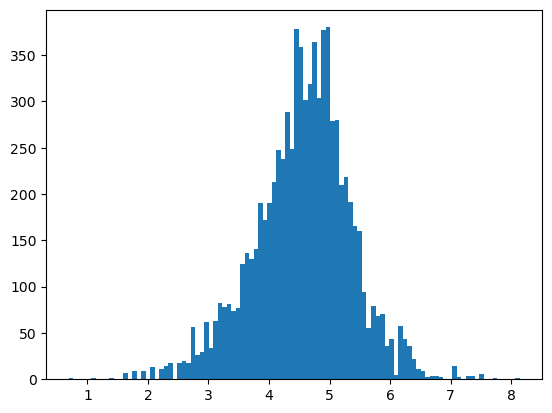

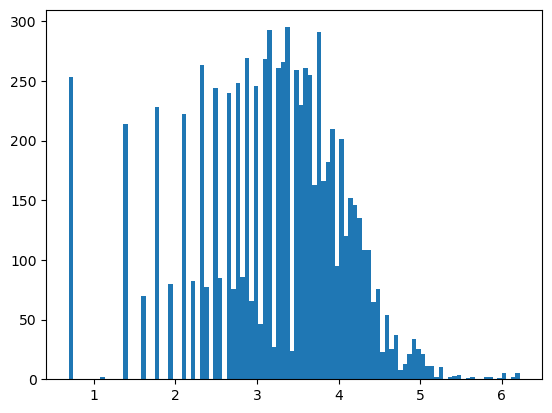

In [14]:
plt.hist(data["loc"], bins=100)
plt.show()
plt.hist(data["branchCount"], bins=100)
plt.show()

### 11. Now split your data into training and test sets. Select row[0:350] of your preprocessed data as training set and rows [350:400] as test set.

In [15]:
data_train = data.iloc[0:350]
data_test = data.iloc[350:400]

In [16]:
data_train

,loc,branchCount,defects
0,3.135494,1.791759,0
1,2.708050,1.386294,0
2,2.484907,1.386294,0
3,2.197225,0.693147,1
5,3.178054,2.079442,0
...,...,...,...
626,3.806662,2.995732,0
630,4.941642,3.688879,0
634,3.496508,3.332205,0
635,5.365976,3.988984,1


In [17]:
data_test

,loc,branchCount,defects
639,4.624973,4.564348,0
644,4.406719,3.258097,1
645,6.287859,4.060443,1
647,4.174387,3.218876,1
648,2.995732,2.484907,0
649,3.713572,2.484907,0
654,4.189655,2.079442,0
657,2.944439,3.091042,0
658,5.323010,3.784190,1
659,3.218876,2.484907,0


### 12. Also divide your training and test sets into features (X) and label (y).

In [18]:
X = data[["loc", "branchCount"]]

In [19]:
X_train = data_train[["loc", "branchCount"]]
Y_train = data_train["defects"]
X_test = data_test[["loc", "branchCount"]]
Y_test = data_test["defects"]

### 13. Now your data may be in 4 parts of X train, y train, X test, y test. Plot the scatter of your training and test samples with feature 1 on x-axis and feature 2 on y-axis. Use different colors for defective and healthy samples.

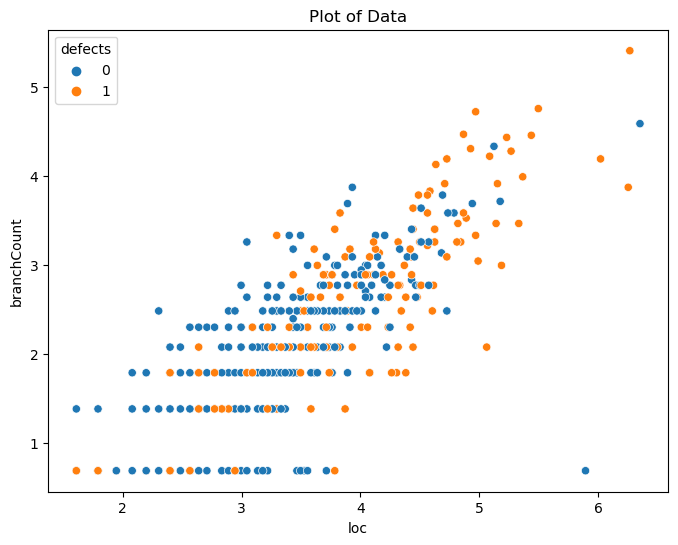

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="loc", y="branchCount", hue="defects", data=data_train, color="orange")
plt.title("Plot of Data")
plt.show()

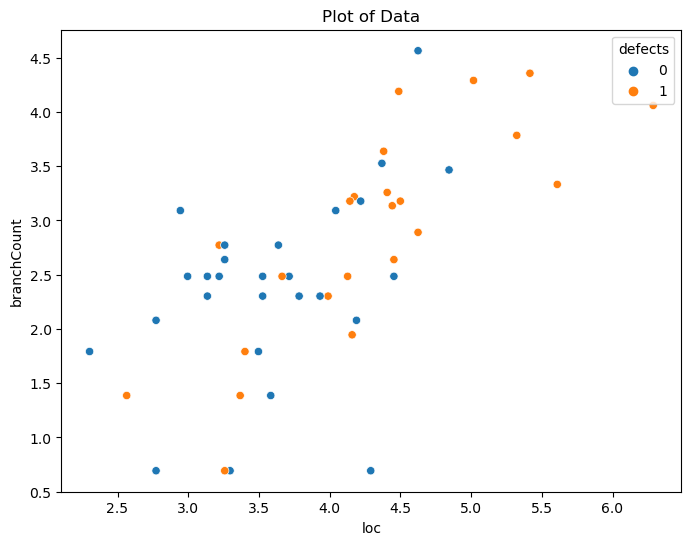

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="loc", y="branchCount", hue="defects", data=data_test, color="orange")
plt.title("Plot of Data")
plt.show()

### 14. Looking at your scatter plot, are defective and healthy samples well separated?
**Answer :**
Yes Almost!

## 2.2 Creating our model: logistic regression

### 1. Before anything else, if your data type is pandas Dataframe, transform it to numpy.

In [22]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

### 2. Implement logistic regression from scratch. Train your model on the training set.

In [23]:
from logstic_regression import LogisticRegression

In [24]:
lr = LogisticRegression(learning_rate=0.01,max_iters=10000)
losses = lr.fit(X_train, Y_train)
hyperplane_params = lr.params

In [25]:
score = lr.score(X_test, Y_test)

print(f"Testing accuracy score of the model is {score}")

Testing accuracy score of the model is 0.7


In [26]:
X= X.values

In [27]:
y = data["defects"].values

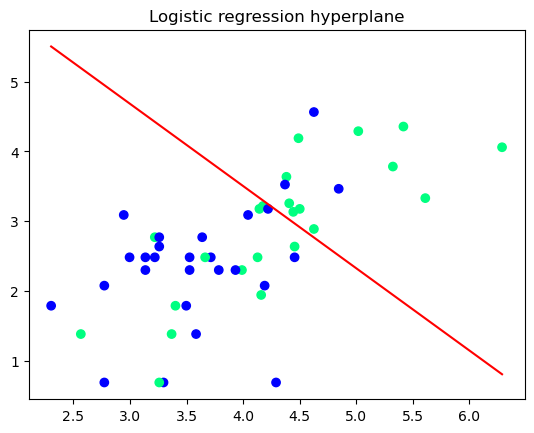

In [28]:
w = hyperplane_params['w']
b = hyperplane_params['b']
x = np.linspace(X_test[:, 0].min(), X_test[:, 0].max())
hyperplane = -(w[0] / w[1]) * x - b / w[1]
plt.title('Logistic regression hyperplane')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='winter')
plt.plot(x, hyperplane, c='red')
plt.show()

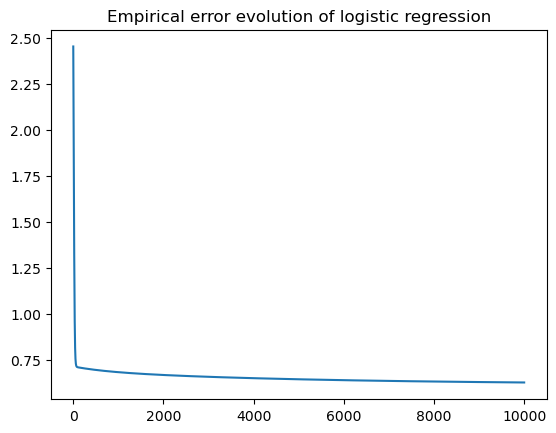

In [29]:
plt.title("Empirical error evolution of logistic regression")
plt.plot(losses)
plt.show()

#### Functions

In [30]:
def generateXvector(X):
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX


def theta_init(X):
    theta = np.zeros((len(X[0]) + 1, 1))
    return theta


def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def Logistics_Regression(X, y, learningrate, iterations):
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2 / m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = -np.sum(
            np.dot(y_new.T, np.log(y_pred) + np.dot((1 - y_new).T, np.log(1 - y_pred)))
        ) / (len(y_pred))
        cost_lst.append(cost_value)
    return theta, cost_lst

In [31]:
# def newton_method(x, y, eps=1e-5):
#     cost_data = []
#     m, n = x.shape
#     theta = np.zeros(n)
#     iteration = 1
#     while True:
#         theta_old = np.copy(theta)

#         h_x = 1 / (1 + np.exp(-x.dot(theta)))
#         H = (x.T * h_x * (1 - h_x)).dot(x) / m
#         gradient_J_theta = x.T.dot(h_x - y) / m

#         theta -= np.linalg.inv(H).dot(gradient_J_theta)
#         cost = cost_function(theta, x, y, sigmoid)
#         cost_data.append(cost)

#         # End training
#         if np.linalg.norm(theta - theta_old, ord=1) < eps:
#             break

#         iteration += 1

#     return theta, cost_data, iteration

In [32]:
# best_theta, best_cost_data , best_itr = newton_method(X_train_with_bias, Y_train)

In [33]:
learning_rates = [1,0.1,0.01, 0.001, 0.0001]
iterations = [100,1000, 10000]

best_theta = None
best_itr = None
best_lr = None
best_cost = float("inf")
best_cost_data = []
m, n = X_train.shape

theta = np.zeros(n + 1)

for lr in learning_rates:
    for iter in iterations:
        theta, cost_data = Logistics_Regression(X_train, Y_train, lr, iter)

        if cost_data[-1] < best_cost:
            best_theta = theta.copy()
            best_itr = iter
            best_lr = lr
            best_cost = cost_data[-1]
            best_cost_data = cost_data.copy()

print("Best thetas:", best_theta)
print("Best learning rate:", best_lr)
print("Best number of iterations:", best_itr)
print("Best cost:", best_cost)

Best thetas: [[-3.74630357]
 [ 0.85249261]
 [ 0.06729643]]
Best learning rate: 0.1
Best number of iterations: 10000
Best cost: 39.1035139005339


#### Algorithem

### 3. Plot cost function for enough iteration.

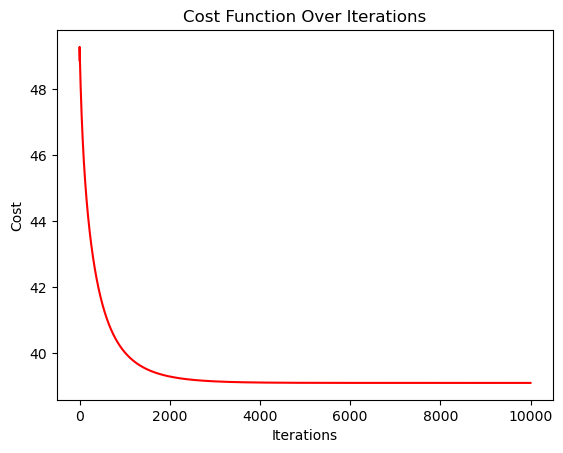

In [34]:
plt.plot(np.arange(best_itr), best_cost_data, color="r")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

### 4. Try different learning rates and different number of iterations. What do you infer from this exper-iment?
**Answer :**
our experimentation revealed that the choice of learning rate and the number of iterations is critical in training a logistic regression model. It is important to strike a balance between a learning rate that avoids instability and an adequate number of iterations for effective convergence. The optimal hyperparameter values may vary depending on the specific dataset and problem, and careful tuning is essential to achieve the best results

### 5. Report the parameters for your logistic regression line. (theta 0 and theta 1)

In [35]:
best_theta

array([[-3.74630357],
       [ 0.85249261],
       [ 0.06729643]])

### 6. Classify samples of both your training and test sets, then report the value of accuracy score between true and predicted values.

In [36]:
def accuracy(predictions, true_labels):
    correct_predictions = 0
    total_predictions = len(true_labels)

    for pred, true_label in zip(predictions, true_labels):
        if pred == true_label:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


training_predictions = (sigmoid(X_train_with_bias @ best_theta) > 0.5).astype(int)

training_accuracy = accuracy(training_predictions, Y_train)

test_predictions = (sigmoid(X_test_with_bias @ best_theta) > 0.5).astype(int)

test_accuracy = accuracy(test_predictions, Y_test)

print("Accuracy on the training set:", training_accuracy, "%")
print("Accuracy on the test set:", test_accuracy, "%")

NameError: name 'sigmoid' is not defined

### 7. Report your logistic regression line in the format of ”y = ax + b”.

In [ ]:
intercept = best_theta[0]
coefficient_loc = best_theta[1]
coefficient_branchCount = best_theta[2]

a = -(best_theta[1] / best_theta[2])
b = -(best_theta[0] / best_theta[2])
logistic_regression_line = f"y = {a}x + {b}"
print(logistic_regression_line)

y = [-12.66772359]x + [55.66867952]


### 8. Plot the training and test sets with different colors along with your logistic regression line (thisline is also the decision boundary).

In [ ]:
def decision_boundary(theta, x):
    return -(theta[0] + theta[1] * x) / theta[2]


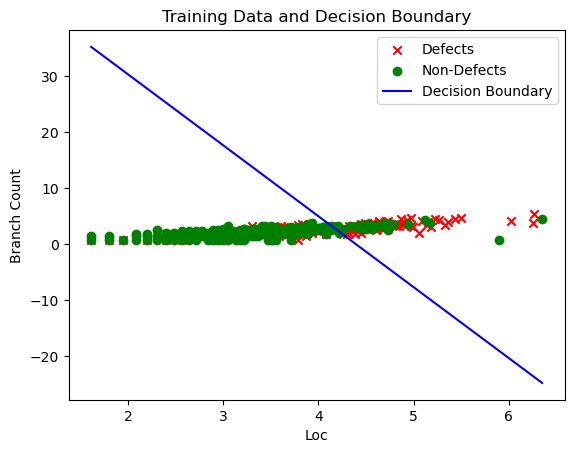

In [ ]:
positive_class = Y_train == 1
negative_class = Y_train == 0

plt.scatter(
    X_train[positive_class][:, 0],
    X_train[positive_class][:, 1],
    c="r",
    marker="x",
    label="Defects",
)
plt.scatter(
    X_train[negative_class][:, 0],
    X_train[negative_class][:, 1],
    c="g",
    marker="o",
    label="Non-Defects",
)

x_range = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
plt.plot(
    x_range, decision_boundary(best_theta, x_range), c="b", label="Decision Boundary"
)

plt.xlabel("Loc")
plt.ylabel("Branch Count")
plt.legend()
plt.title("Training Data and Decision Boundary")

plt.show()

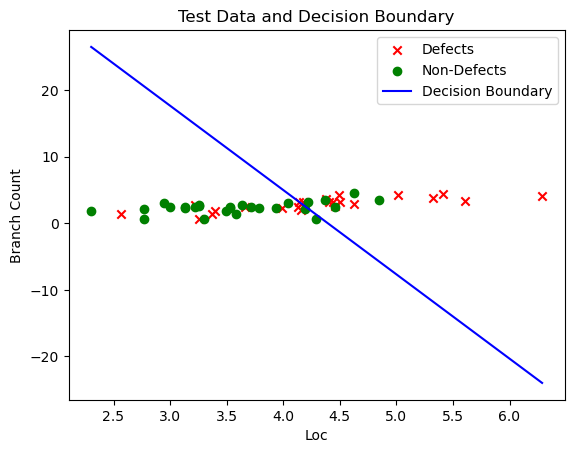

In [ ]:
positive_class = Y_test == 1
negative_class = Y_test == 0

plt.scatter(
    X_test[positive_class][:, 0],
    X_test[positive_class][:, 1],
    c="r",
    marker="x",
    label="Defects",
)
plt.scatter(
    X_test[negative_class][:, 0],
    X_test[negative_class][:, 1],
    c="g",
    marker="o",
    label="Non-Defects",
)

x_range = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), 100)
plt.plot(
    x_range, decision_boundary(best_theta, x_range), c="b", label="Decision Boundary"
)

plt.xlabel("Loc")
plt.ylabel("Branch Count")
plt.legend()
plt.title("Test Data and Decision Boundary")
plt.show()